In [1]:
!pip install -q mediapipe

In [2]:
import numpy as np
import math
import cv2
import mediapipe as mp

from mediapipe.python._framework_bindings import image
from mediapipe.python._framework_bindings import image_frame
from google.colab.patches import cv2_imshow

Descargar pesos para el modelo

In [3]:
!wget -O deeplabv3.tflite -q https://storage.googleapis.com/mediapipe-assets/deeplabv3.tflite

Generar el objeto segmentador de la imagen

In [4]:
OutputType = mp.tasks.vision.ImageSegmenterOptions.OutputType

# Crear las opciones que utilizará el segmentador
base_options = mp.tasks.BaseOptions(model_asset_path = 'deeplabv3.tflite')
options = mp.tasks.vision.ImageSegmenterOptions(base_options = base_options,
                                                output_type = OutputType.CATEGORY_MASK)

# Crear el segmentador de la imagen
segmenter = mp.tasks.vision.ImageSegmenter.create_from_options(options)

Obtener una imagen y cargarla

In [5]:
!wget -q https://storage.googleapis.com/mediapipe-assets/segmentation_input_rotation0.jpg

In [6]:
# Cargar la imagen de entrada
image = mp.Image.create_from_file('segmentation_input_rotation0.jpg')

Aplicar la segmentación a la imagen de entrada

In [7]:
# Encontrar las máscaras para la imagen segmentada
category_masks = segmenter.segment(image)

Almacenar los resultados en `output_image`

In [8]:
# Generar imágenes de color sólido mostrando las máscaras de segmentación (salida)
image_data = image.numpy_view()
fg_image = np.zeros(image_data.shape, dtype=np.uint8)
fg_image[:] = (255, 255, 255) # Blanco para el foreground (máscara)
bg_image = np.zeros(image_data.shape, dtype=np.uint8)
bg_image[:] = (192, 192, 192)   # Plomo para el background

condition = np.stack((category_masks[0].numpy_view(),) * 3, axis=-1) > 0.2
output_image = np.where(condition, fg_image, bg_image)

Mostrar la imagen original y la imagen segmentada

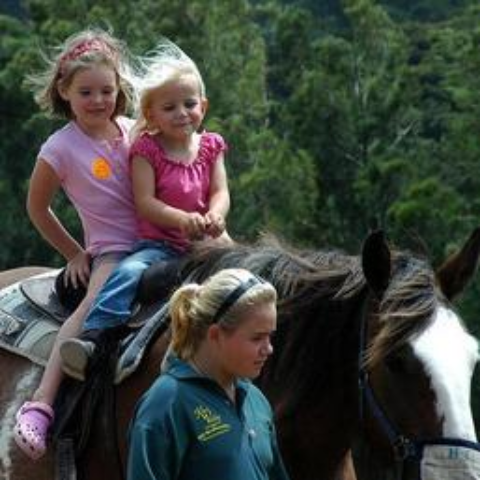

Máscara de segmentación


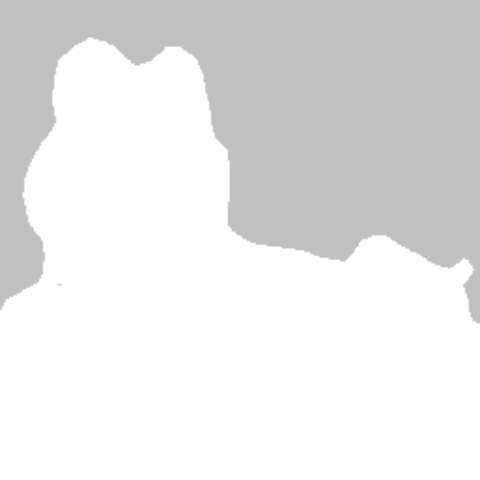

In [9]:
# Altura y anchos usados por el modelo
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

# Escalado de la imagen
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  return img  

# Mostrar la imagen original
image = cv2.imread('segmentation_input_rotation0.jpg')
cv2_imshow(resize_and_show(image))  

# Mostrar la imagen segmentada
print(f'Máscara de segmentación')
img_out = resize_and_show(output_image)
cv2_imshow(img_out)


